<a href="https://colab.research.google.com/github/koci1005/c-programming/blob/main/%20Cancer%20_CTScan_Dicom_Image_Classification%20using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DICOM image

In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the image data
from PIL import Image
import cv2, os, pydicom
from skimage.transform import resize
sns.set_style('whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/16th_Class/CTScanDICOM/overview.csv')
data_df.head()

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


In [ ]:
import os
PATH = "/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/16th_Class/CTScanDICOM/"

In [ ]:
from glob import glob
# glob = Glob will be used to find all path names that matches '*.dcm'
dicom_data = pd.DataFrame([{'path': filepath} for filepath in glob(PATH + "dicom_dir/*.dcm")])

In [ ]:
dicom_data

,path
0,/content/drive/MyDrive/Spring_2025_Course_Deep...
1,/content/drive/MyDrive/Spring_2025_Course_Deep...
2,/content/drive/MyDrive/Spring_2025_Course_Deep...
3,/content/drive/MyDrive/Spring_2025_Course_Deep...
4,/content/drive/MyDrive/Spring_2025_Course_Deep...
...,...
95,/content/drive/MyDrive/Spring_2025_Course_Deep...
96,/content/drive/MyDrive/Spring_2025_Course_Deep...
97,/content/drive/MyDrive/Spring_2025_Course_Deep...
98,/content/drive/MyDrive/Spring_2025_Course_Deep...


In [ ]:
dicom_data['path'].map(os.path.basename)

,path
0,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,ID_0006_AGE_0075_CONTRAST_1_CT.dcm
2,ID_0015_AGE_0061_CONTRAST_1_CT.dcm
3,ID_0007_AGE_0061_CONTRAST_1_CT.dcm
4,ID_0018_AGE_0074_CONTRAST_1_CT.dcm
...,...
95,ID_0094_AGE_0052_CONTRAST_0_CT.dcm
96,ID_0095_AGE_0071_CONTRAST_0_CT.dcm
97,ID_0093_AGE_0067_CONTRAST_0_CT.dcm
98,ID_0098_AGE_0061_CONTRAST_0_CT.dcm


In [ ]:
def process_path(path):
    data = pd.DataFrame([{'path': filepath} for filepath in glob(PATH + path)])
    data['file'] = data['path'].map(os.path.basename)
    data['ID'] = data['file'].map(lambda x : str(x.split('_')[1][2:]))
    data['Age'] = data['file'].map(lambda x : str(x.split('_')[3][2:]))
    data['Contrast'] = data['file'].map(lambda x : str(x.split('_')[5]))
    data['Modality'] = data['file'].map(lambda x : str(x.split('_')[6].split('.')[0]))
    return data

In [ ]:
dicom_data = process_path("dicom_dir/*.dcm")
dicom_data

,path,file,ID,Age,Contrast,Modality
0,/content/drive/MyDrive/Spring_2025_Course_Deep...,ID_0000_AGE_0060_CONTRAST_1_CT.dcm,00,60,1,CT
1,/content/drive/MyDrive/Spring_2025_Course_Deep...,ID_0006_AGE_0075_CONTRAST_1_CT.dcm,06,75,1,CT
2,/content/drive/MyDrive/Spring_2025_Course_Deep...,ID_0015_AGE_0061_CONTRAST_1_CT.dcm,15,61,1,CT
3,/content/drive/MyDrive/Spring_2025_Course_Deep...,ID_0007_AGE_0061_CONTRAST_1_CT.dcm,07,61,1,CT
4,/content/drive/MyDrive/Spring_2025_Course_Deep...,ID_0018_AGE_0074_CONTRAST_1_CT.dcm,18,74,1,CT
...,...,...,...,...,...,...
95,/content/drive/MyDrive/Spring_2025_Course_Deep...,ID_0094_AGE_0052_CONTRAST_0_CT.dcm,94,52,0,CT
96,/content/drive/MyDrive/Spring_2025_Course_Deep...,ID_0095_AGE_0071_CONTRAST_0_CT.dcm,95,71,0,CT
97,/content/drive/MyDrive/Spring_2025_Course_Deep...,ID_0093_AGE_0067_CONTRAST_0_CT.dcm,93,67,0,CT
98,/content/drive/MyDrive/Spring_2025_Course_Deep...,ID_0098_AGE_0061_CONTRAST_0_CT.dcm,98,61,0,CT


In [ ]:
data_df['Contrast'].value_counts()

,count
Contrast,
True,50
False,50


In [ ]:
# Read TIFF Image Data
from skimage.io import imread
# Read Dicom Image
import pydicom as dicom

In [ ]:
def show_images2(data, dim, imtype):
    img_data = list(data[:dim].T.to_dict().values())
    # 16 Images read can be subplot into 4x4
    f, ax = plt.subplots(4, 4, figsize = (16,20))
    for i, data_row in enumerate(img_data):
        if (imtype =='TIFF'):
            data_row_img = imread(data_row['path'])
        elif (imtype == 'DICOM'):
            # Use dcmread instead of read_file
            data_row_img = dicom.dcmread(data_row['path'])
        if (imtype == 'TIFF'):
            ax[i//4, i%4].matshow(data_row_img)
        elif (imtype == 'DICOM'):
            ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap = plt.cm.bone)
    plt.show()

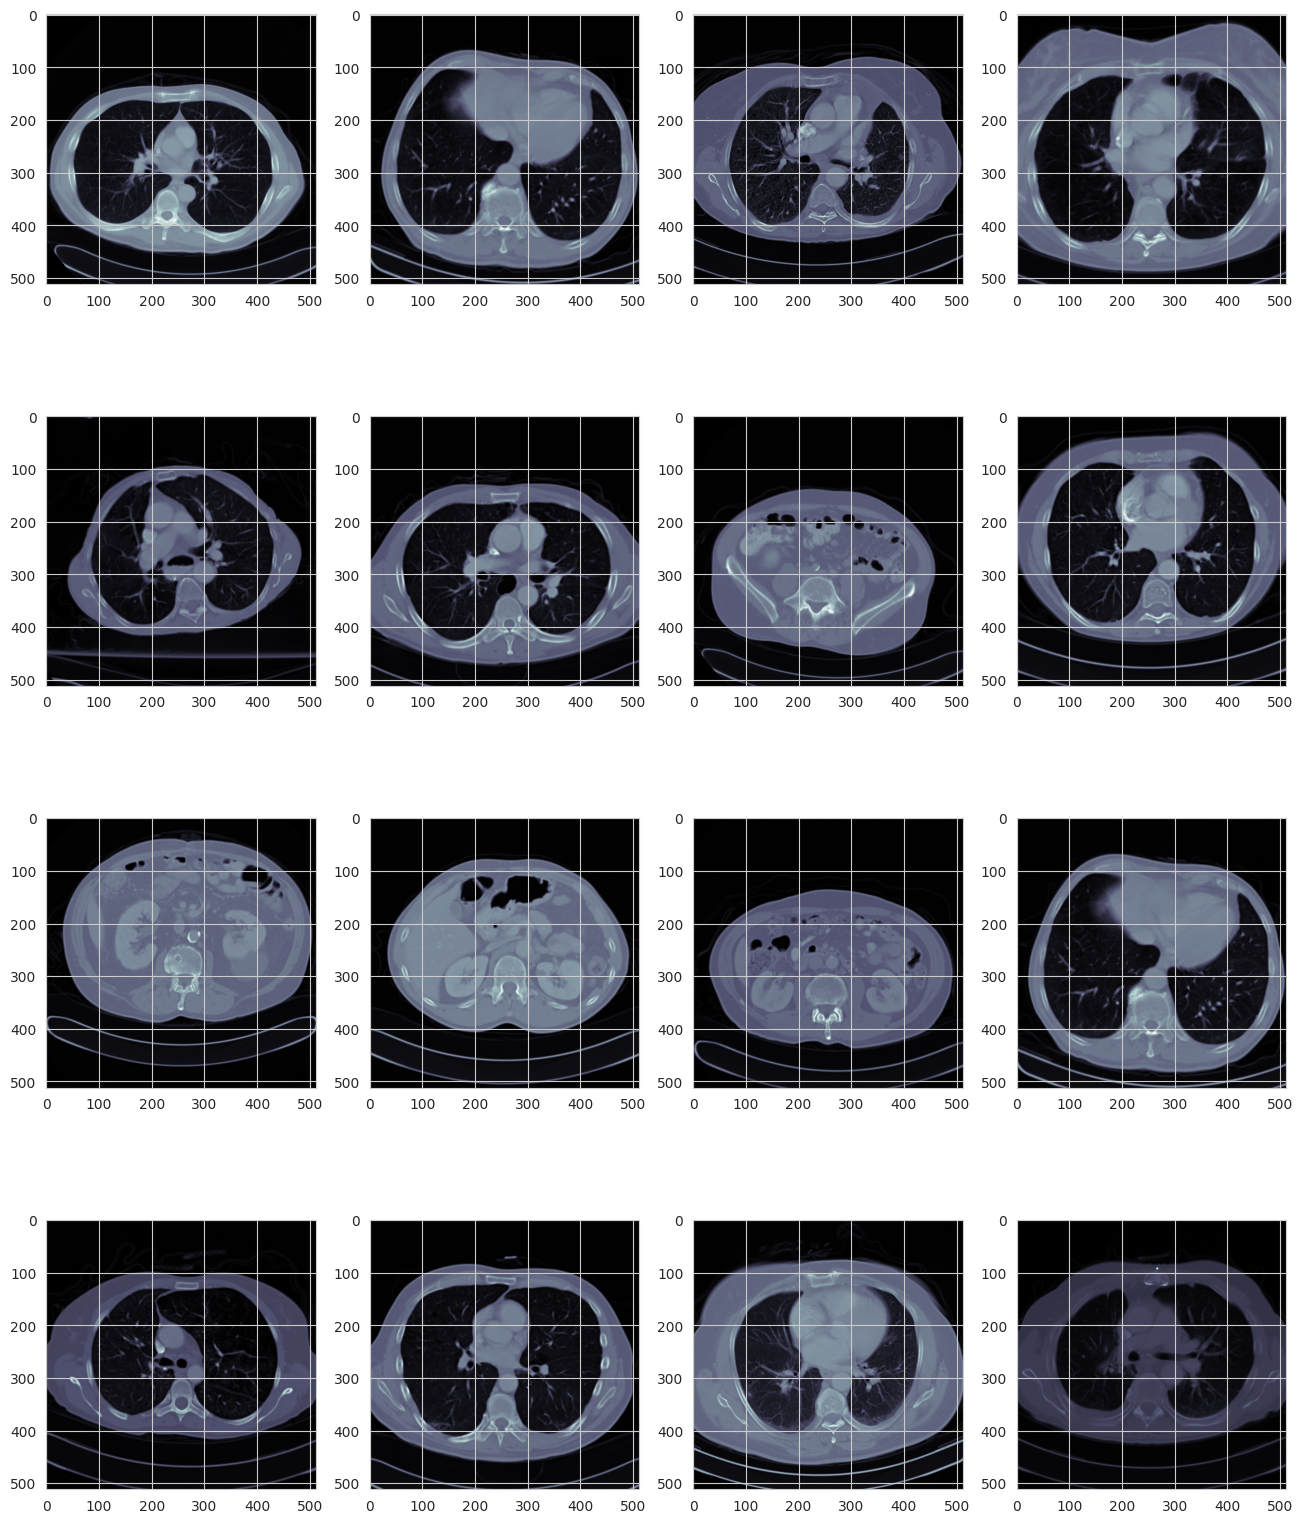

In [ ]:
show_images2(dicom_data, 16, 'DICOM')

In [ ]:
imread(dicom_data['path'][0])

Reading DICOM (examining files): 1/100 files (1.0%)6/100 files (6.0%)7/100 files (7.0%)8/100 files (8.0%)20/100 files (20.0%)32/100 files (32.0%)43/100 files (43.0%)61/100 files (61.0%)80/100 files (80.0%)98/100 files (98.0%)100/100 files (100.0%)
  Found 95 correct series.


array([[-3024, -3024, -3024, ..., -3024, -3024, -3024],
       [-3024, -3024, -3024, ..., -3024, -3024, -3024],
       [-3024, -3024, -3024, ..., -3024, -3024, -3024],
       ...,
       [-3024, -3024, -3024, ..., -3024, -3024, -3024],
       [-3024, -3024, -3024, ..., -3024, -3024, -3024],
       [-3024, -3024, -3024, ..., -3024, -3024, -3024]], dtype=int16)

In [ ]:
imread(dicom_data['path'][0]).shape

Reading DICOM (examining files): 1/100 files (1.0%)14/100 files (14.0%)26/100 files (26.0%)37/100 files (37.0%)51/100 files (51.0%)67/100 files (67.0%)79/100 files (79.0%)96/100 files (96.0%)100/100 files (100.0%)
  Found 95 correct series.


(512, 512)

In [ ]:
np.expand_dims(imread(dicom_data['path'][0])[::2, ::2], 0)

Reading DICOM (examining files): 1/100 files (1.0%)19/100 files (19.0%)29/100 files (29.0%)47/100 files (47.0%)55/100 files (55.0%)69/100 files (69.0%)84/100 files (84.0%)96/100 files (96.0%)100/100 files (100.0%)
  Found 95 correct series.


array([[[-3024, -3024, -3024, ..., -3024, -3024, -3024],
        [-3024, -3024, -3024, ..., -3024, -3024, -3024],
        [-3024, -3024, -3024, ..., -3024, -3024, -3024],
        ...,
        [-3024, -3024, -3024, ..., -3024, -3024, -3024],
        [-3024, -3024, -3024, ..., -3024, -3024, -3024],
        [-3024, -3024, -3024, ..., -3024, -3024, -3024]]], dtype=int16)

In [ ]:
np.expand_dims(imread(dicom_data['path'][0])[::2, ::2], 0).shape

Reading DICOM (examining files): 1/100 files (1.0%)4/100 files (4.0%)16/100 files (16.0%)32/100 files (32.0%)42/100 files (42.0%)61/100 files (61.0%)82/100 files (82.0%)100/100 files (100.0%)
  Found 95 correct series.


(1, 256, 256)

In [ ]:
# Read samples & expand dimentionality
jimread = lambda x : np.expand_dims(imread(x)[::2, ::2], 0)

In [ ]:
jimread

<function __main__.<lambda>(x)>

In [ ]:
all_images_list = glob(os.path.join(PATH, 'dicom_dir', '*.dcm'))
all_images_list

['/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/16th_Class/CTScanDICOM/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm',
 '/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/16th_Class/CTScanDICOM/dicom_dir/ID_0006_AGE_0075_CONTRAST_1_CT.dcm',
 '/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/16th_Class/CTScanDICOM/dicom_dir/ID_0015_AGE_0061_CONTRAST_1_CT.dcm',
 '/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/16th_Class/CTScanDICOM/dicom_dir/ID_0007_AGE_0061_CONTRAST_1_CT.dcm',
 '/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/16th_Class/CTScanDICOM/dicom_dir/ID_0018_AGE_0074_CONTRAST_1_CT.dcm',
 '/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/16th_Class/CTScanDICOM/dicom_dir/ID_0024_AGE_0060_CONTRAST_1_CT.dcm',
 '/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/16th_Class/CTScanDICOM/dicom_dir/ID_0017_AGE_0060_CONTRAST_1_CT.dcm',
 '/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/16th_Class/CTScanDICOM/dicom_dir/ID_0021_AGE_0

In [ ]:
# To merge all samples - Array of Images(concatination), axis = 0(rowwise)
images = np.stack([jimread(i) for i in all_images_list], 0)

Reading DICOM (examining files): 1/100 files (1.0%)11/100 files (11.0%)17/100 files (17.0%)18/100 files (18.0%)28/100 files (28.0%)35/100 files (35.0%)49/100 files (49.0%)61/100 files (61.0%)76/100 files (76.0%)89/100 files (89.0%)96/100 files (96.0%)100/100 files (100.0%)
  Found 95 correct series.
Reading DICOM (examining files): 1/100 files (1.0%)19/100 files (19.0%)41/100 files (41.0%)66/100 files (66.0%)84/100 files (84.0%)100/100 files (100.0%)
  Found 95 correct series.
Reading DICOM (examining files): 1/100 files (1.0%)23/100 files (23.0%)42/100 files (42.0%)61/100 files (61.0%)79/100 files 

#### Spli Data into Train & Test

In [ ]:
label_list = dicom_data['Contrast']
label_list

,Contrast
0,1
1,1
2,1
3,1
4,1
...,...
95,0
96,0
97,0
98,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, label_list, test_size = 0.15, random_state = 0)

In [ ]:
x_train.shape

(85, 1, 256, 256)

In [ ]:
x_test.shape

(15, 1, 256, 256)

In [ ]:
n_train, depth, width, height = x_train.shape
n_test, _, _, _ = x_test.shape

In [ ]:
input_train = x_train.reshape(n_train, width, height, depth)
input_train.shape

(85, 256, 256, 1)

In [ ]:
input_test = x_test.reshape(n_test, width, height, depth)
input_test.shape

(15, 256, 256, 1)

In [ ]:
# Image Pixel Normalization
input_train.astype('float32')
input_train = input_train / np.max(input_train)

In [ ]:
# Image Pixel Normalization
input_test = input_test / np.max(input_test)
input_test.shape

(15, 256, 256, 1)

#### Output Label to categorical Label

In [ ]:
from tensorflow.keras.utils import to_categorical
output_train = to_categorical(y_train, 2)
output_test = to_categorical(y_test, 2)

In [ ]:
print(output_test)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


#### CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model():
    model = Sequential()
    # Conv Layer - I
    model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', padding = 'same', input_shape = (256, 256, 1)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Conv Layer - II
    model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Conv Layer - III
    model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Conv Layer - IV
    model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(Flatten())

    # Input Layer - I
    model.add(Dense(units = 256, activation='relu'))
    model.add(Dropout(0.5))
    # Output Layer
    model.add(Dense(units = 2, activation='softmax'))

    # model compile
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
model_dicom = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_dicom.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,759,042 (33.41 MB)

 Trainable params: 8,759,042 (33.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import callbacks
filepath = "/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/16th_Class/model_dicom.keras"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor = 'val_loss',save_best_only=True, mode = 'min', verbose = 1)
checkpoint

In [ ]:
import datetime
logdir = os.path.join("/content/drive/MyDrive/Spring_2025_Course_Deep_Learning/16th_Class/model_dicom_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = callbacks.TensorBoard(logdir)

In [ ]:
history = model_dicom.fit(input_train, output_train, epochs=50, batch_size=20, shuffle=True, validation_data= (input_test, output_test),
                    steps_per_epoch = 5, callbacks = [checkpoint,tensorboard_callback], verbose = 1)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4402 - loss: 0.7282
Epoch 1: val_loss improved from inf to 0.69436, saving model to /content/drive/MyDrive/Spring_2025_Course_Deep_Learning/16th_Class/model_dicom.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 8s/step - accuracy: 0.4414 - loss: 0.7373 - val_accuracy: 0.4000 - val_loss: 0.6944
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4613 - loss: 0.6982
Epoch 2: val_loss did not improve from 0.69436
5/5 ━━━━━━━━━━━━━━━━━━━━ 75s 6s/step - accuracy: 0.4668 - loss: 0.6984 - val_accuracy: 0.4000 - val_loss: 0.7026
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5227 - loss: 0.6929
Epoch 3: val_loss did not improve from 0.69436
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.5219 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6987
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4727 - loss: 0.6949
Epoch 4: val_loss did not improve from 0.69436
5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - accuracy